In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

加载数据

In [118]:
def load_data():
    data = np.loadtxt("data.txt",delimiter= ",")
    data = np.array(data)
    n = data.shape[1]-1#特征数量
    X = data[:, :n]
    y = data[:,-1].reshape(-1,1)
    return X, y

画散点图

In [119]:
def plot_data(X, y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos,0], X[pos,1], marker="x")
    plt.scatter(X[neg,0], X[neg,1], marker="o")
    plt.xlabel("Exam 1")
    plt.ylabel("Exam 2")
    plt.show()
    plt.show()

[[ 54.96714153  52.0039428 ]
 [ 48.61735699  52.77158568]
 [ 56.47688538  44.55980223]
 [ 65.23029856  51.85802958]
 [ 47.65846625  52.34457979]
 [ 47.65863043  44.28518866]
 [ 65.79212816  64.92619609]
 [ 57.67434729  53.79066337]
 [ 45.30525614  40.46957202]
 [ 55.42560044  55.25242887]
 [ 45.36582307  42.20254664]
 [ 45.34270246  56.29667683]
 [ 52.41962272  59.26876463]
 [ 30.86719755  43.43454145]
 [ 32.75082167  57.70700903]
 [ 44.37712471  53.30224742]
 [ 39.8716888   56.57648128]
 [ 53.14247333  65.17434386]
 [ 40.91975924  48.03689507]
 [ 35.87696299  43.97011069]
 [ 64.65648769  42.88388456]
 [ 47.742237    43.47351772]
 [ 50.67528205  49.38318632]
 [ 35.75251814  52.7292158 ]
 [ 44.55617275  52.21352639]
 [ 51.1092259   56.61746599]
 [ 38.49006423  50.10401514]
 [ 53.75698018  61.62827262]
 [ 43.9936131   47.88274533]
 [ 47.0830625   71.76135333]
 [ 43.98293388  55.00533878]
 [ 68.52278185  43.14273955]
 [ 49.86502775  41.43286002]
 [ 39.42289071  53.85977932]
 [ 58.22544912

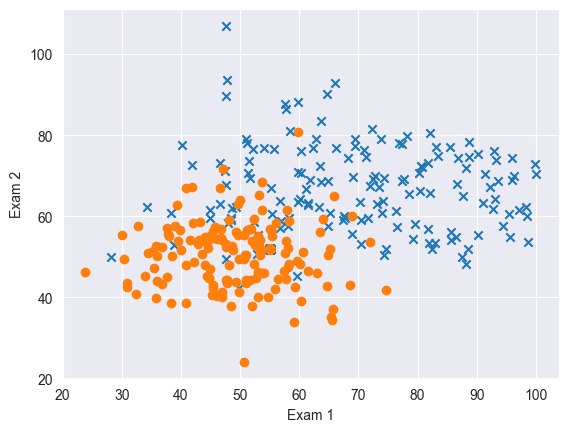

In [120]:
X,y = load_data()
print(X, y)
plot_data(X,y)


# 实现sigmoid函数

In [121]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(3)
sigmoid(np.array([1,2,3]))

array([0.73105858, 0.88079708, 0.95257413])

# 实现假设函数

In [122]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# 实现损失函数

In [123]:
def cost_function(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    J = -1/m * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return J

# 预测函数

In [124]:
def predict(X, theta):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    h = hypothesis(X, theta)
    return np.where(h >= 0.5, 1, 0)

# 实现梯度下降

In [125]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    X= np.hstack((np.ones((m,1)),X))
    # 初始化损失列表
    for i in range(num_iters):
        for j in range(X.shape[1]):
            theta[j] = theta[j] - alpha/m * np.sum((hypothesis(X, theta) - y)*X[:,j].reshape(-1,1))

        if(i%1000 == 0):
            print("迭代次数：",i,"损失值：",cost_function(X,y,theta))

    return theta

In [126]:
X,y = load_data()
n = X.shape[1]
theta = np.zeros(n+1).reshape(n+1,1)
theta = gradient_descent(X,y,theta,0.01,100000)
print("theta:",theta)

迭代次数： 0 损失值： 5.586324278691648
迭代次数： 1000 损失值： 3.2964518776474407
迭代次数： 2000 损失值： 4.169928784911702
迭代次数： 3000 损失值： 4.1076779568405115
迭代次数： 4000 损失值： 4.125061353269596
迭代次数： 5000 损失值： 3.3075459000811627
迭代次数： 6000 损失值： 4.446550254259704
迭代次数： 7000 损失值： 1.2448186114458586
迭代次数： 8000 损失值： 2.889287833907629
迭代次数： 9000 损失值： nan
迭代次数： 10000 损失值： 3.0204602946013392
迭代次数： 11000 损失值： 1.1588775920609866
迭代次数： 12000 损失值： 2.1533900146734815
迭代次数： 13000 损失值： 3.0861486747973217
迭代次数： 14000 损失值： 0.8838281640543123
迭代次数： 15000 损失值： 2.647023740298573
迭代次数： 16000 损失值： 2.136121960854813
迭代次数： 17000 损失值： 4.356541032083131


/var/folders/f0/6w3z6qy11fj72gycgls4kq6r0000gn/T/ipykernel_42018/1767954318.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1/m * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
/var/folders/f0/6w3z6qy11fj72gycgls4kq6r0000gn/T/ipykernel_42018/1767954318.py:4: RuntimeWarning: invalid value encountered in multiply
  J = -1/m * np.sum(y*np.log(h) + (1-y)*np.log(1-h))


迭代次数： 18000 损失值： 1.7772666208702943
迭代次数： 19000 损失值： 4.859894522876995
迭代次数： 20000 损失值： 2.5371848304780076
迭代次数： 21000 损失值： 1.842735994414635
迭代次数： 22000 损失值： 1.8038225290858878
迭代次数： 23000 损失值： 2.211904454392037
迭代次数： 24000 损失值： 1.6913373852628064
迭代次数： 25000 损失值： 3.255521414520398
迭代次数： 26000 损失值： 2.0992856395241533
迭代次数： 27000 损失值： 1.5581720256569256
迭代次数： 28000 损失值： 3.1778908392892355
迭代次数： 29000 损失值： 3.661144698787148
迭代次数： 30000 损失值： 1.235003738299279
迭代次数： 31000 损失值： 1.677893573870065
迭代次数： 32000 损失值： 1.5302520411571534
迭代次数： 33000 损失值： nan
迭代次数： 34000 损失值： 1.6675442661010118
迭代次数： 35000 损失值： nan
迭代次数： 36000 损失值： 0.9953962086090036
迭代次数： 37000 损失值： 0.9977582820877026
迭代次数： 38000 损失值： nan
迭代次数： 39000 损失值： 1.0073375545676935
迭代次数： 40000 损失值： 1.129497360212735
迭代次数： 41000 损失值： 0.9407057309856207
迭代次数： 42000 损失值： 1.477997426381275
迭代次数： 43000 损失值： 1.4644837931815573
迭代次数： 44000 损失值： 1.0510029376378092
迭代次数： 45000 损失值： 0.7159145070787628
迭代次数： 46000 损失值： 0.6292944557676333
迭代次数： 4700

# 画出决策边界

In [127]:
def plot_decision_boundary(X, y, theta):
    cm_dark = mpl.colors.ListedColormap(['#FF8080', '#00FFFF'])
    plt.scatter(X[:,0], X[:,1], c=np.array(y).squeeze(), s=10, cmap=cm_dark)

    x1 = np.arange(min(X[:,0]),max(X[:,0]), 0.01)
    x2 = -(theta[0] + theta[1]*x1)/theta[2]
    plt.plot(x1, x2)
    plt.show()

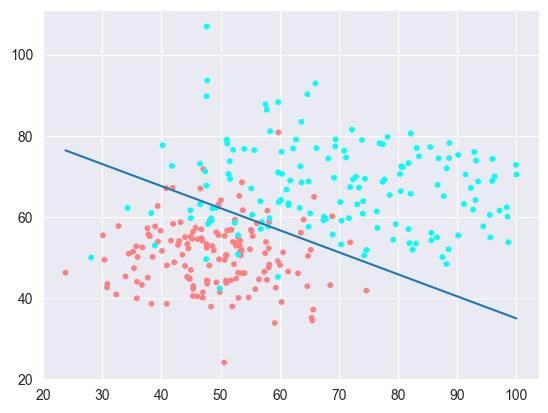

In [128]:
plot_decision_boundary(X, y, theta)

In [130]:
p = predict(X, theta)
print('准确率：%f',accuracy_score(y, p))

准确率：%f 0.88
